# Identifying low-performing analyses at a veterinary clinic

<p><div class="toc"><ul class="toc-item"><li><span><a href="#Identifying-low-performing-analyses-at-a-veterinary-clinic" data-toc-modified-id="Identifying-low-performing-analyses-at-a-veterinary-clinic-1">Identifying low-performing analyses at a veterinary clinic</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1">Introduction</a></span><ul class="toc-item"><li><span><a href="#Data-description" data-toc-modified-id="Data-description-1.1.1">Data description</a></span></li></ul></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-1.2">Data cleaning</a></span><ul class="toc-item"><li><span><a href="#invoices" data-toc-modified-id="invoices-1.2.1"><code>invoices</code></a></span></li><li><span><a href="#info_analyses" data-toc-modified-id="info_analyses-1.2.2"><code>info_analyses</code></a></span></li><li><span><a href="#materials_ema" data-toc-modified-id="materials_ema-1.2.3"><code>materials_ema</code></a></span></li><li><span><a href="#info_materials" data-toc-modified-id="info_materials-1.2.4"><code>info_materials</code></a></span></li><li><span><a href="#Data-validation:-materials_ema-and-info_materials" data-toc-modified-id="Data-validation:-materials_ema-and-info_materials-1.2.5">Data validation: <code>materials_ema</code> and <code>info_materials</code></a></span></li><li><span><a href="#info_ema" data-toc-modified-id="info_ema-1.2.6"><code>info_ema</code></a></span></li><li><span><a href="#info_vetmed" data-toc-modified-id="info_vetmed-1.2.7"><code>info_vetmed</code></a></span></li><li><span><a href="#info_est" data-toc-modified-id="info_est-1.2.8"><code>info_est</code></a></span></li></ul></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-1.3">Data analysis</a></span><ul class="toc-item"><li><span><a href="#Calculation-of-profit-margin-for-each-device" data-toc-modified-id="Calculation-of-profit-margin-for-each-device-1.3.1">Calculation of profit margin for each device</a></span><ul class="toc-item"><li><span><a href="#Results" data-toc-modified-id="Results-1.3.1.1">Results</a></span></li><li><span><a href="#Graphical-representation" data-toc-modified-id="Graphical-representation-1.3.1.2">Graphical representation</a></span></li><li><span><a href="#Number-of-different-analyses-ran-by-each-device" data-toc-modified-id="Number-of-different-analyses-ran-by-each-device-1.3.1.3">Number of different analyses ran by each device</a></span></li></ul></li><li><span><a href="#Total-profits-for-all-devices" data-toc-modified-id="Total-profits-for-all-devices-1.3.2">Total profits for all devices</a></span><ul class="toc-item"><li><span><a href="#Results" data-toc-modified-id="Results-1.3.2.1">Results</a></span></li></ul></li><li><span><a href="#Average-minimal-cost-of-analyses" data-toc-modified-id="Average-minimal-cost-of-analyses-1.3.3">Average minimal cost of analyses</a></span><ul class="toc-item"><li><span><a href="#Results" data-toc-modified-id="Results-1.3.3.1">Results</a></span></li><li><span><a href="#Graphical-representation" data-toc-modified-id="Graphical-representation-1.3.3.2">Graphical representation</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.4">Conclusion</a></span></li></ul></li></ul></div>

## Introduction

Most veterinary clinics routinely run a wide range of analyses for their clients, such as blood counts, microbial swabs, or biochemical profiles. These tests require dedicated materials, which need to be regularly purchased, as well as a variety of devices, which require specialised maintenance. With many tests being run every week, it is easy to lose track of whether the cost of materials and maintenance is being sufficiently offset by the proceeds of these analyses. This information could be used by the veterinary clinic to evaluate whether the price or frequency of certain analyses needs to be adjusted, or whether it would be more cost-effective to outsource low-performing analyses to external laboratories.

### Data description

The data was sourced from a private veterinary clinic in Southern Italy, in the Naples region, and while the data spans multiple years, this study focuses only on 2018. The data was distributed among a variety of different files:

- `invoices`, a .dbf file produced automatically by the clinic management software, containing the invoices issued during the entire year. The file was converted to a .csv before being imported.
- `info_analyses`, a manually compiled .csv file sourced from the clinic manager, containing information regarding which device carries out which analyses.
- `materials_ema`, a .xls file produced by the materials and maintenance provider. The spreadsheet was automatically compiled by the provider's website, and it contains the invoice details of all purchases of their services. The file was converted to a .csv before being imported.
- `info_materials`, a .ods file manually compiled by the clinic manager, containing further information on the purchasing of the materials from the provider. The file was converted to a .csv before being imported.
- `info_ema`, a manually compiled .csv file sourced from the clinic manager, containing information regarding the maintenance fees (*"EMA"*) for each of the IDEXX devices.
- `info_vetmed`, a manually compiled .csv file sourced from the clinic manager, containing further information regarding the invoices issued from IDEXX for the use of their laboratories (*"VetMed"* service).
- `info_est`, a .ods file manually compiled by the clinic manager, containing information on the cost of outsourcing analyses to an external laboratory (not IDEXX). The file was converted to a .csv before being imported.

**Note**: the header row of some dataframes have been translated from Italian to English for easier comprehension. To prevent accidentally altering the data, the bodies of the dataframes were not translated. Feel free to contact me directly if you require further information on any of the Italian text displayed in this notebook.

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='darkgrid', rc={'figure.facecolor':'white'})
sns.set_palette("hls", 7)

pd.options.mode.chained_assignment = None # ignore two false positive SettingWithCopyWarning

## Data cleaning

### `invoices`

This file contains information on all the invoices issued by the clinic in 2018. The columns contain the following information:
- **invoice_no**: the identification number of the invoice. If an invoice was issued for more than one service, those services will have the same identification number;
- **date**: the date the invoice was issued, converted to a datetime object (yyyy/mm/dd);
- **client**: the client identification code;
- **qty**: the quantity of services provided;
- **type**: the type of service provided, selected from a predefined list;
- **service**: the specific service provided, selected from a predefined list;
- **price**: the total price of the service(s) in EUR, without sales tax;
- **IVA**: the sales tax, i.e. the Italian version of VAT;
- **ENPAV**: a contribution paid to the ENPAV, an organisation responsible for providing a pension to veterinarians in Italy.

In [2]:
invoices_header_eng = ["invoice_no", "date", "client", "qty", "type", "service", "price", "IVA", "ENPAV"]

invoices = pd.read_csv("datasets/invoices_2018.csv", names=invoices_header_eng, skiprows=1, parse_dates=[1], dayfirst=True)
invoices.head()

,invoice_no,date,client,qty,type,service,price,IVA,ENPAV
0,1,2018-01-02,6248,1,AMBULATORIO,VISITA+ES. COPROLOGICO,28.13,6.31,0.56
1,2,2018-01-02,4467,1,ANALISI,TEST SNAP 4DX + SNAP LEISH,28.13,6.31,0.56
2,3,2018-01-02,6247,1,AMBULATORIO,INDAGINE XGRAFICA + SEDAZIONE,40.18,9.02,0.80
3,4,2018-01-02,5362,1,VACCINAZIONI,VERSICAN DHPPI+L4,40.18,9.02,0.80
4,5,2018-01-02,3537,1,VACCINAZIONI,VERSICAN DHPPI+L4,40.18,9.02,0.80


The information contained in the *"invoice_no"*, *"client"*, and *"qty"* columns is not relevant to this investigation, thus they were removed. The columns *"IVA"* and *"ENPAV"* were also removed, as these fees are an addition to the sales price which does not contribute to the final proceeds of the clinic.

In [3]:
invoices_clean = invoices.drop(columns=["invoice_no", "client", "qty", "IVA", "ENPAV"])
invoices_clean.head()

,date,type,service,price
0,2018-01-02,AMBULATORIO,VISITA+ES. COPROLOGICO,28.13
1,2018-01-02,ANALISI,TEST SNAP 4DX + SNAP LEISH,28.13
2,2018-01-02,AMBULATORIO,INDAGINE XGRAFICA + SEDAZIONE,40.18
3,2018-01-02,VACCINAZIONI,VERSICAN DHPPI+L4,40.18
4,2018-01-02,VACCINAZIONI,VERSICAN DHPPI+L4,40.18


Of the types of services available, this study only focuses on one: *"Analisi"*, i.e. analyses. A new dataframe was created only containing invoices for those services.

In [4]:
analyses = invoices_clean[invoices_clean.type == "ANALISI"]
analyses.head()

,date,type,service,price
1,2018-01-02,ANALISI,TEST SNAP 4DX + SNAP LEISH,28.13
6,2018-01-02,ANALISI,EMOCROMO CON FORMULA,20.09
14,2018-01-03,ANALISI,TEST SNAP 4DX + SNAP LEISH,28.13
17,2018-01-04,ANALISI,EMOCROMO CON FORMULA,20.09
18,2018-01-04,ANALISI,PROFILO BIOCHIMICO 15+ ELETTROLITI,40.18


In [5]:
print(analyses.dtypes)
analyses.describe(include="all")

date       datetime64[ns]
type               object
service            object
price             float64
dtype: object


,date,type,service,price
count,733,733,733,733.000000
unique,202,1,33,NaN
top,2018-12-06 00:00:00,ANALISI,EMOCROMO CON FORMULA,NaN
freq,13,733,234,NaN
first,2018-01-02 00:00:00,NaN,NaN,NaN
last,2018-12-20 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,25.899905
std,NaN,NaN,NaN,10.873029
min,NaN,NaN,NaN,8.040000
25%,NaN,NaN,NaN,20.090000


The dataset appears clean, all values are of the expected types and ranges, and there is no missing data.

### `info_analyses`

The info on the device used for each analysis was collected from one of the clinic managers and stored as a .csv. The table features two columns:
- **service**: the name of the analysis;
- **device**: the device used to carry out the analysis.

The devices are abbreviated as follows:
- **CATALYST** indicates a device called "Catalyst" by IDEXX;
- **CITO** indicates the analysis is run by a veterinarian external to the clinic;
- **COAG** indicates a device called "Coag DX" by IDEXX; 
- **EST** indicates the analysis is delegated to an external laboratory;
- **VETMED** indicates the analysis is delegated to IDEXX Laboratories, Inc.;
- **LASER** indicates a device called "Lasercyte" by IDEXX;
- **NO** indicates the analysis does not require any devices;
- **SNAP** indicates a device called "SNAP" by IDEXX;
- **UA** indicates a device called "UA", or "Urinary Analysis", by IDEXX.

In [6]:
info_analyses = pd.read_csv("datasets/info_analyses.csv").sort_values("device")
info_analyses.head()

,service,device
32,PROFILO BIOCHIMICO 17,CATALYST
19,PROFILO BIOCHIMICO 10,CATALYST
13,PROTEINA C REATTIVA,CATALYST
12,ESAME ELETTROLITI,CATALYST
22,PROFILO RENALE + PRELIEVO,CATALYST


The information contained in this table is needed to separate the services contained in the `analyses` dataframe based on the device they are carried out on. Therefore, a left merge was carried out on the two dataframes, resulting in the addition of a *"device"* column to the existing `analyses` table.

In [7]:
analyses_full = analyses.merge(info_analyses, how='left')
analyses_full.head()

,date,type,service,price,device
0,2018-01-02,ANALISI,TEST SNAP 4DX + SNAP LEISH,28.13,SNAP
1,2018-01-02,ANALISI,EMOCROMO CON FORMULA,20.09,LASER
2,2018-01-03,ANALISI,TEST SNAP 4DX + SNAP LEISH,28.13,SNAP
3,2018-01-04,ANALISI,EMOCROMO CON FORMULA,20.09,LASER
4,2018-01-04,ANALISI,PROFILO BIOCHIMICO 15+ ELETTROLITI,40.18,CATALYST


Per request of the clinic manager, this study will include all devices **except "CITO" and "NO"**, which are not a priority in this situation. The instances of analyses classified as such were therefore removed from the final table.

In [8]:
analyses_final = analyses_full[(analyses_full.device != "CITO") & (analyses_full.device != "NO")]

devices_list = analyses_final["device"].unique()

if "CITO" not in devices_list and "NO" not in devices_list:
    print('OK - "CITO" and "NO" were successfully removed from the dataframe.')
else:
    print("ERROR - Devices list does not meet requirements.")
    print(devices_list)

OK - "CITO" and "NO" were successfully removed from the dataframe.


### `materials_ema`

This file contains information on the purchasing of materials and maintenance (referred to as *"EMA"*) from *IDEXX, Inc.* Superfluous empty heading rows were removed upon importing. The columns contain the following information:

- **status**: the status of the order. This dataset should only contain orders marked as complete (i.e. *"Eseguiti"*);
- **document_type**: the type of document issued, mainly invoices (i.e. *"Fattura"*);
- **document_no**: the identification number of the document issued;
- **issue_date**: the date the document was issued, converted to a datetime object;
- **total**: the total price of the order (including IVA, i.e. sales tax). This columns includes both orders that were paid to the provider, as well as cashbacks sent by the provider to the user, indicated with a "-" (minus) before the total amount.
- **currency**: the currency the order was paid in. For this dataset, it should be exclusively EUR;
- **date**: deadline for the payment of the order, converted to a datetime object. 

In [9]:
materials_header_eng = ["status", "document_type", "document_no", "issue_date", "total", "currency", "date"]

materials_ema = pd.read_csv("datasets/materials_ema.csv", names=materials_header_eng, skiprows=5, parse_dates=[3,6], dayfirst=True)
materials_ema.head()

,status,document_type,document_no,issue_date,total,currency,date
0,Eseguiti,Fattura,2290036213,2019-03-31,859.12,EUR,2019-05-25
1,Eseguiti,Fattura,180424798,2019-03-25,557.87,EUR,2019-05-31
2,Eseguiti,Fattura,2290034963,2019-02-28,1872.69,EUR,2019-04-25
3,Eseguiti,Fattura,180418722,2019-02-28,141.76,EUR,2019-03-30
4,Eseguiti,Fattura,2290033679,2019-01-31,572.48,EUR,2019-03-25


In [10]:
print(materials_ema.dtypes)
materials_ema.describe(include="all")

status                   object
document_type            object
document_no               int64
issue_date       datetime64[ns]
total                    object
currency                 object
date             datetime64[ns]
dtype: object


,status,document_type,document_no,issue_date,total,currency,date
count,126,126,1.260000e+02,126,126,126,120
unique,1,2,NaN,117,83,1,98
top,Eseguiti,Fattura,NaN,2016-04-30 00:00:00,318.87,EUR,2016-05-31 00:00:00
freq,126,120,NaN,2,16,126,3
first,NaN,NaN,NaN,2013-01-28 00:00:00,NaN,NaN,2013-03-31 00:00:00
last,NaN,NaN,NaN,2019-03-31 00:00:00,NaN,NaN,2019-05-31 00:00:00
mean,NaN,NaN,7.328070e+08,NaN,NaN,NaN,NaN
std,NaN,NaN,9.313064e+08,NaN,NaN,NaN,NaN
min,NaN,NaN,1.801653e+08,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.802043e+08,NaN,NaN,NaN,NaN


The description of the table confirmed that the data is of the expected range and type, and that there is no missing values, except for 6 items in the *"date"* column. This is because a deadline does not apply to cashback amounts, and therefore those cells have remained empty. The description also shows that the dataframe contains items dating from 2013 up to 2019, and that, because of the format of some values, the *"total"* column is not stored as a series of floats, but as strings.

The only columns that contain information relevant to this analysis are *"document_no"*, to identify the invoice, *"issue_date"*, to identify the correct time frame, and *"total"*, for the total price paid plus sales tax. The other columns were therefore removed from the dataset.

In [11]:
materials_ema_clean = materials_ema.loc[:,["document_no", "issue_date", "total"]]
materials_ema_clean.head()

,document_no,issue_date,total
0,2290036213,2019-03-31,859.12
1,180424798,2019-03-25,557.87
2,2290034963,2019-02-28,1872.69
3,180418722,2019-02-28,141.76
4,2290033679,2019-01-31,572.48


As mentioned above, the dataset contains invoices issued as far back as 2013, but this study only focuses on the year 2018. A new dataframe was created (`materials_ema_year`) that only contained invoices from that year, plus one specific invoice that was issued on the 31st of December 2017, as this was meant to provide materials for analyses carried out in 2018.

In [12]:
materials_ema_year = materials_ema_clean[materials_ema_clean["issue_date"].dt.year == 2018]
materials_ema_year.tail()

,document_no,issue_date,total
23,180340295,2018-03-26,199.15
24,180340032,2018-03-23,318.87
25,2290020813,2018-02-28,1240.44
26,2290019546,2018-01-31,"-768,60"
27,2290019546,2018-01-31,"-768,60"


The *"issue_date"* column was inspected to confirm it only contains invoices from 2018.

In [13]:
materials_ema_year["issue_date"].describe(include="all")

count                      23
unique                     19
top       2018-03-31 00:00:00
freq                        2
first     2018-01-31 00:00:00
last      2018-12-28 00:00:00
Name: issue_date, dtype: object

In [14]:
end_of_year = materials_ema_clean[(materials_ema_clean["issue_date"] == pd.Timestamp(dt.date(year=2017, month=12, day=31)))]
materials_ema_full = materials_ema_year.append(end_of_year)
materials_ema_full.tail()

,document_no,issue_date,total
24,180340032,2018-03-23,318.87
25,2290020813,2018-02-28,1240.44
26,2290019546,2018-01-31,"-768,60"
27,2290019546,2018-01-31,"-768,60"
28,2290018290,2017-12-31,2380.1


The full version of the table, instead, also features the last day of 2017, as required.

In [15]:
materials_ema_full["issue_date"].describe(include="all")

count                      24
unique                     20
top       2018-01-31 00:00:00
freq                        2
first     2017-12-31 00:00:00
last      2018-12-28 00:00:00
Name: issue_date, dtype: object

The dataframe was checked for duplicates, as two identical entries were found at rows 26-27.

In [16]:
materials_ema_final = materials_ema_full.drop_duplicates()
materials_ema_final.tail()

,document_no,issue_date,total
23,180340295,2018-03-26,199.15
24,180340032,2018-03-23,318.87
25,2290020813,2018-02-28,1240.44
26,2290019546,2018-01-31,"-768,60"
28,2290018290,2017-12-31,2380.1


As seen when analysing the dataframe, the column *"total"* is not being recognised as a float but as a string, and was therefore converted.

In [17]:
materials_ema_final.loc[:,"total"] = materials_ema_final.loc[:,"total"].replace(",",".", regex=True)
materials_ema_final.loc[:,"total"] = materials_ema_final.loc[:,"total"].apply(pd.to_numeric)

materials_ema_final.tail()

,document_no,issue_date,total
23,180340295,2018-03-26,199.15
24,180340032,2018-03-23,318.87
25,2290020813,2018-02-28,1240.44
26,2290019546,2018-01-31,-768.60
28,2290018290,2017-12-31,2380.10


In [18]:
print(materials_ema_final.dtypes)
materials_ema_final.describe(include="all")

document_no             int64
issue_date     datetime64[ns]
total                 float64
dtype: object


,document_no,issue_date,total
count,2.300000e+01,23,23.000000
unique,NaN,20,NaN
top,NaN,2018-03-31 00:00:00,NaN
freq,NaN,2,NaN
first,NaN,2017-12-31 00:00:00,NaN
last,NaN,2018-12-28 00:00:00,NaN
mean,1.097613e+09,NaN,541.888261
std,1.069318e+09,NaN,666.185049
min,1.803400e+08,NaN,-768.600000
25%,1.803779e+08,NaN,131.945000


The table now appears clean, with no missing values, and featuring only invoices from the dates of interest.

### `info_materials`

This dataset contains further information on the materials purchased for the year 2018 (including the last order of the 31st of December 2017), as manually recorded by the clinic manager. This information is necessary to determine the cost of materials for each separate device. The columns contain the following information:

- **document_no**: the identification number of the issued invoice;
- **date**: the date materials were delivered to the clinic, converted to a datetime object;
- **qty**: the amount purchased;
- **device**: the device that utilises the purchased materials;
- **product**: the product name;
- **unit_price**: the price per unit of the product (excluding IVA, i.e. sales tax);
- **total**: the total price paid (excluding IVA).

In [19]:
info_materials_header_eng = ["document_no", "date", "qty", "device", "product", "unit_price", "total"]

info_materials = pd.read_csv("datasets/info_materials.csv", names=info_materials_header_eng, skiprows=1, parse_dates=[1], dayfirst=True)
info_materials.head()

,document_no,date,qty,device,product,unit_price,total
0,2290018290,2017-12-31,2,snap,SNAP 4DX plus,236.70,473.40
1,2290018290,2017-12-31,1,cat,Chem 10,164.75,164.75
2,2290018290,2017-12-31,1,cat,Chem 17,280.85,280.85
3,2290018290,2017-12-31,1,cat,ALT,38.35,38.35
4,2290018290,2017-12-31,3,cat,Chem 15,262.20,786.60


The information contained in the *"qty"*, *"product"*, and *"unit_price"* columns is not relevant to this investigation, and has therefore been removed. Then, the format of the *"device"* column was edited to match that of the abbreviations used in the same column in the `analyses_info` dataframe (e.g. turning "cat" into "CATALYST").

In [20]:
info_materials_clean = info_materials.drop(columns=["qty", "product", "unit_price"])
info_materials_clean.head()

,document_no,date,device,total
0,2290018290,2017-12-31,snap,473.40
1,2290018290,2017-12-31,cat,164.75
2,2290018290,2017-12-31,cat,280.85
3,2290018290,2017-12-31,cat,38.35
4,2290018290,2017-12-31,cat,786.60


In [21]:
print("Unique 'device' values:", info_materials_clean["device"].unique())
print("Format to match in analyses_info:", info_analyses["device"].unique())

info_materials_clean["device"] = info_materials_clean["device"].str.upper()
info_materials_clean["device"] = info_materials_clean["device"].replace("CAT", "CATALYST")

print("Values after editing:", info_materials_clean["device"].unique())
info_materials_clean.head()

Unique 'device' values: ['snap' 'cat' 'laser' 'coag']
Format to match in analyses_info: ['CATALYST' 'CITO' 'COAG' 'EST' 'LASER' 'NO' 'SNAP' 'UA' 'VETMED']
Values after editing: ['SNAP' 'CATALYST' 'LASER' 'COAG']


,document_no,date,device,total
0,2290018290,2017-12-31,SNAP,473.40
1,2290018290,2017-12-31,CATALYST,164.75
2,2290018290,2017-12-31,CATALYST,280.85
3,2290018290,2017-12-31,CATALYST,38.35
4,2290018290,2017-12-31,CATALYST,786.60


### Data validation: `materials_ema` and `info_materials`

The hand-compiled information contained in the `info_materials` dataset refers to the same transactions contained in `materials_ema`, with the following differences:
- EMA fees, i.e. the price of maintenance, and cashbacks, are not included in `info_materials`;
- The total price paid in `info_materials` excludes sales taxes (i.e. IVA), and is therefore smaller than the one found in `materials_ema` by 22% (the value of IVA in Italy in 2018).

Both datasets are fundamental to this investigation, as the `materials_ema` dateset alone does not give information on which purchase went towards which device. While the `info_materials` dataset has this information, it needs to be validated before it can be used, since it was hand-compiled by the clinic manager and could contain errors. 

The following section was created to validate the prices and document numbers contained in the `info_materials` dataset to verify its integrity. This was done by adding the sales tax on the prices recorded by the clinic manager and comparing them to the ones recorded by the provider.

In [22]:
total_invoice_manual = info_materials_clean.groupby("document_no")["total"].sum()
total_invoice_manual_IVA = round(total_invoice_manual + (total_invoice_manual * 0.22), 2)
print("Values recorded by clinic manager, plus IVA:")
total_invoice_manual_IVA.head()

Values recorded by clinic manager, plus IVA:


document_no
2290018290    2380.10
2290020813    1233.12
2290021903     962.09
2290023055     294.57
2290024241    1834.82
Name: total, dtype: float64

While the `materials_ema` dataset already groups the total based on the document number, the same code was applied to both datasets to avoid mistakes, e.g. in case one of the invoices from `materials_ema` had been divided into multiple entries, and to maintain format consistency.

In [23]:
total_invoice_auto = materials_ema_final.groupby("document_no")["total"].sum()
print("Values recorded by provider, including IVA:")
total_invoice_auto.head()

Values recorded by provider, including IVA:


document_no
180340032    318.87
180340295    199.15
180342072    127.37
180360648    557.87
180362770     66.73
Name: total, dtype: float64

The following section applied an inner merge to the two tables, which selects only invoices that are common to both datasets. Then, a column was added to facilitate comparison:

- **difference**: the difference in EUR between the the total from `info_materials` plus tax (*"total_manual_IVA"*) and the total from `materials_ema` (*"total_auto"*).

In [24]:
total_comparison = pd.concat([total_invoice_manual_IVA, total_invoice_auto], axis=1, join="inner")
total_comparison.columns = ["total_manual_IVA", "total_auto"]
total_comparison.reset_index(inplace=True)

total_comparison["difference"] = total_comparison["total_manual_IVA"] - total_comparison["total_auto"]
total_comparison

,document_no,total_manual_IVA,total_auto,difference
0,2290018290,2380.10,2380.10,0.00
1,2290020813,1233.12,1240.44,-7.32
2,2290021903,962.09,962.09,0.00
3,2290023055,294.57,301.89,-7.32
4,2290024241,1834.82,1834.82,0.00
5,2290026638,976.73,976.73,0.00
6,2290028869,854.98,854.98,0.00
7,2290030085,941.11,941.11,0.00
8,2290031249,956.78,956.79,-0.01


Three entries do not seem to match, the ones on rows indexed 1, 3 and 8. While the one on row 8 is minimal and probably caused by rounding errors, the ones on rows 1 and 3 are more significant. 

When the clinic manager was asked about these differences, they explained it had to do with delivery fees that were only applied for those two orders and thus were not recorded in the manual spreadsheet. Due to the difference being small and justified, `info_materials` was deemed accurate enough to use to identify the material cost associated with each IDEXX device.

### `info_ema`

This dataset contains further information on the maintenance fees for the IDEXX devices. The data was collected directly from the clinic manager and it is necessary to calculate the total expenses the clinic faces for each individual device. The columns contain the following information:

- **device**: the abbreviation of the device as seen in `info_analyses`;
- **ema**: the maintenance fee paid every three months by the clinic for that device in EUR (excluding IVA).

A new device appears in this dataset, **VETLAB**. This was clarified to be a computer that manages all other IDEXX devices, therefore its maintenance does not pertain to any analysis in particular and was distributed equally onto all the other maintenance costs. This is not to be confused with VETMED, the abbreviation that identifies the analyses outsourced to IDEXX Laboratories, Inc.

In [25]:
info_ema = pd.read_csv("datasets/info_ema.csv", index_col="device")
info_ema

,ema
device,
CATALYST,163.24
VETLAB,45.18
LASER,159.40
COAG,41.60
UA,15.19


In [26]:
info_ema["year_ema"] = round(info_ema["ema"] * 3, 2)
info_ema

,ema,year_ema
device,,
CATALYST,163.24,489.72
VETLAB,45.18,135.54
LASER,159.40,478.20
COAG,41.60,124.80
UA,15.19,45.57


In [27]:
vetlab_cost = info_ema.loc["VETLAB","year_ema"]
print("Vetlab year cost:", vetlab_cost)

Vetlab year cost: 135.54


In [28]:
if "VETLAB" in info_ema.index:
    vetlab_distributed = info_ema.loc["VETLAB","year_ema"] / (len(info_ema.index) - 1)
    info_ema["total_vetlab"] = info_ema["year_ema"] + vetlab_distributed
    info_ema.drop("VETLAB", inplace=True)

info_ema

,ema,year_ema,total_vetlab
device,,,
CATALYST,163.24,489.72,523.605
LASER,159.40,478.20,512.085
COAG,41.60,124.80,158.685
UA,15.19,45.57,79.455


To confirm that the total has not changed after distributing the VETLAB cost:

In [29]:
if (info_ema["year_ema"].sum() + vetlab_cost) == info_ema["total_vetlab"].sum():
    print("OK - The total before and after distribution is unchanged.")
else:
    print("ERROR - The totals before and after distribution do not match.")

OK - The total before and after distribution is unchanged.


### `info_vetmed`

Apart from the materials and maintenance of the devices, another cost faced by the clinic is that of externally ran analyses, i.e. those that get delegated to a different laboratory. One of these is the VetMed Laboratory by IDEXX: the fees paid for this service can be found in `materials_ema`, as they are from the same provider. However, since the specifics of the invoice are not present in that dataframe, further information was collected on which invoices were issued specifically for the VetMed service. 

This can be found in the `info_vetmed` .csv file, which was used to recall the required totals from the `materials_ema` dataset.

In [30]:
info_vetmed = pd.read_csv("datasets/info_vetmed.csv")
info_vetmed

,document_no
0,180342072
1,180362770
2,180375530
3,180382799
4,180390664
5,180404090


In [31]:
info_vetmed_full = info_vetmed.merge(materials_ema_final.loc[:,["document_no","total"]], how="left")
info_vetmed_full

,document_no,total
0,180342072,127.37
1,180362770,66.73
2,180375530,127.37
3,180382799,136.52
4,180390664,66.73
5,180404090,66.73


### `info_est`

This file contains information on the cost of analyses outsourced to another, non-IDEXX external laboratory, abbreviated as **EST** so far.

The columns contain the following information:
- **date**: the date the invoice was issued, converted to a datetime object;
- **invoice_no**: the identification number of the invoice;
- **invoice_amount**: total amount featured in the invoice;
- **amount_no_IVA**: the invoice amount without sales tax, i.e. IVA;
- **retention_tax**: the withholding tax relative to the amount without IVA;
- **date_paid**: the date the total was paid, converted to a datetime object;
- **total**: the sum of the amount without IVA and the retention tax;
- **ref_month**: the months of the year during which the services were carried out.

In [32]:
info_est_header_eng = ["date", "invoice_no", "invoice_amount", "amount_no_IVA", "retention_tax", "date_paid", "total", "ref_month"]

info_est = pd.read_csv("datasets/info_est.csv", names=info_est_header_eng, skiprows=1, parse_dates=[0, 5], dayfirst=True)
info_est.head()

,date,invoice_no,invoice_amount,amount_no_IVA,retention_tax,date_paid,total,ref_month
0,2016-04-12,57,88.77,72.76,17.0,2016-05-16,89.76,gen feb mar
1,2016-06-12,95,157.18,128.84,30.1,2016-08-22,158.94,mag
2,2016-07-10,136,48.04,39.38,9.2,2016-08-22,48.58,giu
3,2016-10-18,213,43.86,35.95,8.4,2016-11-16,44.35,NaN
4,2016-12-30,258,28.20,23.11,5.4,2017-02-16,28.51,NaN


The only columns that contain information that is relevant to this analysis are *"date"* and *"total"*, as the former allows us to select the invoices from the year of interest, while the latter allows us to calculate the final expense faced by the clinc. A new dataframe with only these two columns was therefore created, and all items from years other than 2018 were removed.

In [33]:
info_est_clean = info_est.loc[:,["date", "total"]]
info_est_clean.head()

,date,total
0,2016-04-12,89.76
1,2016-06-12,158.94
2,2016-07-10,48.58
3,2016-10-18,44.35
4,2016-12-30,28.51


In [34]:
info_est_final = info_est_clean[info_est_clean["date"].dt.year == 2018]
info_est_final.head()

,date,total
13,2018-03-07,99.27
14,2018-05-07,146.79
15,2018-06-12,99.27
16,2018-07-10,63.36
17,2018-08-06,71.81


In [35]:
info_est_final["date"].describe(include="all")

count                      10
unique                     10
top       2018-08-06 00:00:00
freq                        1
first     2018-03-07 00:00:00
last      2018-12-30 00:00:00
Name: date, dtype: object

The description above confirms that the table only contains data from 2018.

## Data analysis

Note: all values used do not include sales tax (i.e. IVA).

### Calculation of profit margin for each device

In [36]:
devices_proceeds = analyses_final.groupby("device")["price"].sum().sort_values(ascending=False)

print("Proceeds per device:")
devices_proceeds

Proceeds per device:


device
CATALYST    5830.95
LASER       4725.17
SNAP        4621.36
EST         1243.27
VETMED       642.88
UA           490.40
COAG         301.36
Name: price, dtype: float64

In [37]:
devices_materials = info_materials_clean.groupby("device")["total"].sum().sort_values(ascending=False)

print("Cost of materials per device:")
devices_materials

Cost of materials per device:


device
CATALYST    4676.15
SNAP        2263.80
LASER       1277.95
COAG         334.80
Name: total, dtype: float64

In [38]:
ema_cost_year = info_ema["total_vetlab"]

print("Cost of maintenance per device:")
ema_cost_year

Cost of maintenance per device:


device
CATALYST    523.605
LASER       512.085
COAG        158.685
UA           79.455
Name: total_vetlab, dtype: float64

In [39]:
info_vetmed_year = info_vetmed_full["total"].sum()

print("Total cost of VETMED analyses for the year:", info_vetmed_year)

Total cost of VETMED analyses for the year: 591.45


In [40]:
est_cost_year = info_est_final["total"].sum()

print("Total cost of EST analyses for the year:", est_cost_year)

Total cost of EST analyses for the year: 892.37


In [41]:
devices_profit = pd.concat([devices_proceeds, devices_materials, ema_cost_year], axis=1, sort=True)
devices_profit.columns = ["proceeds", "materials_cost", "ema_cost"]

# add the cost of outsourced analyses (VETMED and EST) to a new column
devices_profit.loc["VETMED","other_costs"] = info_vetmed_year
devices_profit.loc["EST", "other_costs"] = est_cost_year

devices_profit.fillna(0, inplace=True)
devices_profit

,proceeds,materials_cost,ema_cost,other_costs
CATALYST,5830.95,4676.15,523.605,0.00
COAG,301.36,334.80,158.685,0.00
EST,1243.27,0.00,0.000,892.37
LASER,4725.17,1277.95,512.085,0.00
SNAP,4621.36,2263.80,0.000,0.00
UA,490.40,0.00,79.455,0.00
VETMED,642.88,0.00,0.000,591.45


#### Results

To calculate the profits for each device, three columns were added to the previous table:

- **total_cost**, which sums all costs for that device;
- **profit**, the difference between the proceeds and the total cost;
- **profit_%**, the profit percentage for that device, i.e. the percentage of the profit calculated based on the cost price. This allows to see which devices return higher profits when taking into account their running cost.

In [42]:
devices_profit["total_cost"] = round(devices_profit.loc[:,"materials_cost":"other_costs"].sum(axis=1), 2)
devices_profit["profit"] = round(devices_profit["proceeds"] - devices_profit["total_cost"], 2)
devices_profit["profit_%"] = round(devices_profit["profit"] / devices_profit["total_cost"] * 100, 2)
devices_profit

,proceeds,materials_cost,ema_cost,other_costs,total_cost,profit,profit_%
CATALYST,5830.95,4676.15,523.605,0.00,5199.76,631.19,12.14
COAG,301.36,334.80,158.685,0.00,493.48,-192.12,-38.93
EST,1243.27,0.00,0.000,892.37,892.37,350.90,39.32
LASER,4725.17,1277.95,512.085,0.00,1790.04,2935.13,163.97
SNAP,4621.36,2263.80,0.000,0.00,2263.80,2357.56,104.14
UA,490.40,0.00,79.455,0.00,79.46,410.94,517.17
VETMED,642.88,0.00,0.000,591.45,591.45,51.43,8.70


#### Graphical representation

Below it is possible to see a representation of the previous results. The only device to present negative profit is the COAG, while all the others are positive with different margins. 

The device that was more profitable overall is the UA, i.e. the Urine Analysis device, followed by the LASER, i.e. the Lasercyte, and the SNAP. Outsourcing analyses does not seem to allow a large margin of profit, as seen by the low percentages of EST and VETMED. 

Interestingly, the device that produced the highest proceeds, the CATALYST, is also one of those with the lowest profit margin due to the high cost of its materials. This might also be due to the fact that the CATALYST is used for a wider variety of tests than other devices, as shown below the graph, and might require a larger number of different materials.

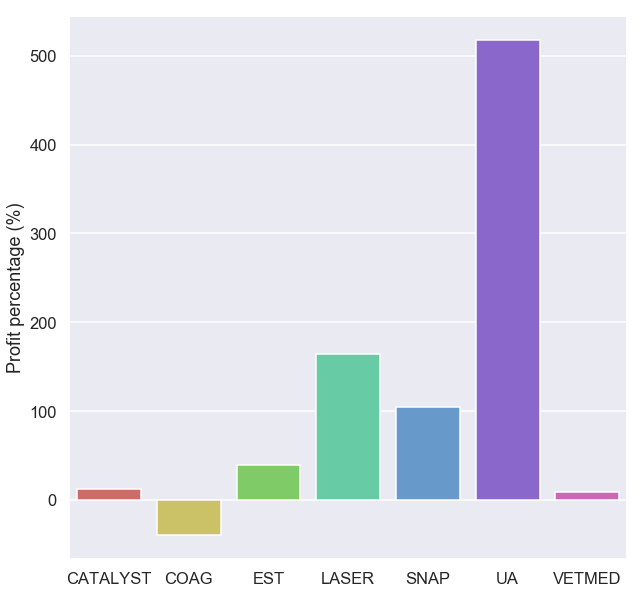

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.barplot(data=devices_profit, x=devices_profit.index, y="profit_%", ax=ax)
g.set(ylabel = "Profit percentage (%)", xlabel = "")
plt.show()

#### Number of different analyses ran by each device

In [44]:
info_analyses["device"].value_counts()

CATALYST    11
EST          8
SNAP         5
NO           4
UA           1
LASER        1
CITO         1
COAG         1
VETMED       1
Name: device, dtype: int64

### Total profits for all devices

Per request of the clinic manager, the total profits across all IDEXX devices (CATALYST, COAG, LASER, SNAP, and UA) was calculated. First, the rows regarding EST and VETMED were removed, and the total for each column was calculated in a new TOTALS row. Then, the amount of cashback given by IDEXX for that year was calculated and added to the total profit value. 

Due to the varying nature of the IDEXX cashback program, it was in fact not possible to properly separate the amount between the various IDEXX devices, and can thus only be taken into account when looking at all devices together.

In [45]:
devices_profit_IDEXX = devices_profit[(devices_profit.index != "EST") & (devices_profit.index != "VETMED")]
devices_profit_IDEXX

,proceeds,materials_cost,ema_cost,other_costs,total_cost,profit,profit_%
CATALYST,5830.95,4676.15,523.605,0.0,5199.76,631.19,12.14
COAG,301.36,334.80,158.685,0.0,493.48,-192.12,-38.93
LASER,4725.17,1277.95,512.085,0.0,1790.04,2935.13,163.97
SNAP,4621.36,2263.80,0.000,0.0,2263.80,2357.56,104.14
UA,490.40,0.00,79.455,0.0,79.46,410.94,517.17


In [46]:
if "TOTAL" not in devices_profit_IDEXX.index:
    devices_profit_IDEXX.loc["TOTAL"] = devices_profit_IDEXX.sum()

devices_profit_IDEXX

,proceeds,materials_cost,ema_cost,other_costs,total_cost,profit,profit_%
CATALYST,5830.95,4676.15,523.605,0.0,5199.76,631.19,12.14
COAG,301.36,334.80,158.685,0.0,493.48,-192.12,-38.93
LASER,4725.17,1277.95,512.085,0.0,1790.04,2935.13,163.97
SNAP,4621.36,2263.80,0.000,0.0,2263.80,2357.56,104.14
UA,490.40,0.00,79.455,0.0,79.46,410.94,517.17
TOTAL,15969.24,8552.70,1273.830,0.0,9826.54,6142.70,758.49


#### Results

In [47]:
idexx_profit = devices_profit_IDEXX.loc["TOTAL", "profit"]

print("Total profit of all IDEXX devices:", idexx_profit)


cashback_rows = materials_ema_final[materials_ema_final["total"] < 0]
cashback_total = abs(cashback_rows["total"].sum())
cashback_total_no_IVA = cashback_total / 1.22

print("Total cashback received:", cashback_total_no_IVA)


profit_cashback = idexx_profit + cashback_total_no_IVA

print("Total profit including cashback:", profit_cashback)

Total profit of all IDEXX devices: 6142.7
Total cashback received: 630.0
Total profit including cashback: 6772.7


### Average minimal cost of analyses

This section calculates the minimum average price that needs to be charged for the analyses of each device based on the cost of materials and maintenance of the device itself, and on the number of times the device was used in 2018. 

Again, it is important to remember that **"CITO"** and **"NO"** -type services are excluded from this analysis. Furthermore, the price calculated is to be considered merely indicative, seen how some of the devices carry out a wide variety of tests that could be priced very differently.

In [48]:
services_prices = analyses_final.loc[:,["service", "price"]]
services_prices.drop_duplicates(["service", "price"], inplace=True)
services_prices_mean = services_prices.groupby("service")["price"].mean()

print("Average price charged in 2018 for each service:")
services_prices_mean.head()

Average price charged in 2018 for each service:


service
CONTROLLO GLICEMICO GIORNALIERO (2 TEST)    14.0650
EMOCROMO CON FORMULA                        22.5020
ESAME DELLE URINE                           12.0550
ESAME DELLE URINE CON SEDIMENTO             20.0925
ESAME DELLE URINE PU/CU                     25.4500
Name: price, dtype: float64

In [49]:
services_count = analyses_final["service"].value_counts()

print("Number of times each analysis was ran in 2018:")
services_count.head()

Number of times each analysis was ran in 2018:


EMOCROMO CON FORMULA                  234
TEST SNAP 4DX + SNAP LEISH            152
PROFILO BIOCHIMICO 15                 106
ESAME DELLE URINE                      57
PROFILO BIOCHIMICO 15+ ELETTROLITI     34
Name: service, dtype: int64

After finding the mean price charger per service and the number of times it was carried out in the year, this information was combined in a new dataframe, and the `info_analyses` dataframe was once again used to add a new column indicating which device was responsible for that service.

In [50]:
services_minimum = pd.concat([services_prices_mean, services_count], axis=1, sort=False)
services_minimum.reset_index(inplace=True)
services_minimum.columns = ["service", "mean_charge", "count"]
services_minimum.head()

,service,mean_charge,count
0,CONTROLLO GLICEMICO GIORNALIERO (2 TEST),14.0650,2
1,EMOCROMO CON FORMULA,22.5020,234
2,ESAME DELLE URINE,12.0550,57
3,ESAME DELLE URINE CON SEDIMENTO,20.0925,6
4,ESAME DELLE URINE PU/CU,25.4500,3


In [51]:
services_minimum_full = services_minimum.merge(info_analyses, how="left")
services_minimum_full.head()

,service,mean_charge,count,device
0,CONTROLLO GLICEMICO GIORNALIERO (2 TEST),14.0650,2,CATALYST
1,EMOCROMO CON FORMULA,22.5020,234,LASER
2,ESAME DELLE URINE,12.0550,57,UA
3,ESAME DELLE URINE CON SEDIMENTO,20.0925,6,EST
4,ESAME DELLE URINE PU/CU,25.4500,3,EST


The addition of this column allowed to group the services based on their device, and to produce a mean charge and a final count for each. Finally, the total cost for each device was extracted from the `devices_profit` dataframe and added to the table.

In [52]:
grouped_prices_mean = round(services_minimum_full.groupby("device")["mean_charge"].mean(), 2)
grouped_services_count = services_minimum_full.groupby("device")["count"].sum()

grouped_minimum = pd.concat([grouped_prices_mean, grouped_services_count], axis=1, sort=False)
grouped_minimum["total_cost"] = round(devices_profit["total_cost"], 2)
grouped_minimum

,mean_charge,count,total_cost
device,,,
CATALYST,26.30,177,5199.76
COAG,22.10,14,493.48
EST,25.22,43,892.37
LASER,22.50,234,1790.04
SNAP,27.05,159,2263.80
UA,12.06,57,79.46
VETMED,80.36,8,591.45


#### Results

Two columns were added to the table to allow comparison between actual charges and minimum charges required to cover costs:

- **minimum_charge**: the minimum charge required to cover device costs, found by dividing the total cost for the device by the number of times it was used;
- **difference**: the mean price charged minus the minimum charge necessary to cover cost. Negative values indicate that the analysis is being sold at a loss.

In [53]:
grouped_minimum["minimum_charge"] = round(grouped_minimum["total_cost"] / grouped_minimum["count"], 2)
grouped_minimum["difference"] = grouped_minimum["mean_charge"] - grouped_minimum["minimum_charge"]
grouped_minimum

,mean_charge,count,total_cost,minimum_charge,difference
device,,,,,
CATALYST,26.30,177,5199.76,29.38,-3.08
COAG,22.10,14,493.48,35.25,-13.15
EST,25.22,43,892.37,20.75,4.47
LASER,22.50,234,1790.04,7.65,14.85
SNAP,27.05,159,2263.80,14.24,12.81
UA,12.06,57,79.46,1.39,10.67
VETMED,80.36,8,591.45,73.93,6.43


#### Graphical representation

The graph below represents the results obtained in the `grouped_minimum` table above. The values obtained need to be taken with a grain of salt for the devices that are used for many different types of analyses. As shown before, these are the CATALYST, the EST and the SNAP, which respectively run 11, 8 and 5 different types of analyses. Seen as these are sometimes priced very differently, finding a minimum charge based on the overall cost of running the entire device would not be accurate, but could still be indicative of a problem in case of a prominently negative value.

On the other hand, the calculation is accurate for single-analysis devices, i.e. the LASER, the COAG, VETMED and the UA. With the exception of the COAG, we can see that all the mean charged prices are well above the minimum charge necessary to cover costs, and indeed these devices all produced positive profits.

The highly negative result of the COAG, instead, is consistent with the loss identified in the profit analysis, and it shows how the loss is in part linked to the fact that running each analysis costs on average EUR 13.15 more than what the client is charged.

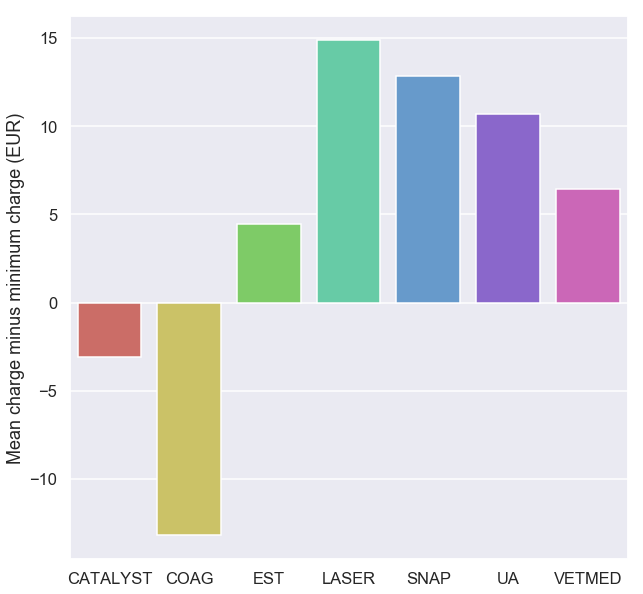

In [54]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.barplot(data=grouped_minimum, x=grouped_minimum.index, y="difference", ax=ax)
g.set(ylabel = "Mean charge minus minimum charge (EUR)", xlabel="")
plt.show()

## Conclusion

These results were presented to the clinic manager in the form of an in-person explanation of the conclusions reached, along with graphical visualisations, i.e. the plots previously produced. Upon contacting them at a later date I was informed that, in the light of the results obtained by this investigation, two decisions were made:

- The COAG device is currently operating at a loss: since it is not viable for the clinic to raise the existing charges, it was decided that the analysis related to it will be outsourced to an external laboratory from now on;
- The current CATALYST device, which had been purchased by the clinic a few years ago, has the highest proceeds among all the devices, but also the highest running cost: in the future, it will be substituted by a similar one, which will be instead on loan for use. According to the manager's research, this would help bring down the price of materials and maintenance, widening the gap between the device's proceeds and costs, and raising the currently thin profit margin.

Overall, the clinic manager was happy with the insight provided by the investigation, not only because it allowed them to adjust situations in which they were operating at a loss, but also because they were able to appreciate the processes that are running properly, and understand at a glance how this side of their business is performing.